Welcome to my kernel sentiment analysis on The Rotten Tomatoes movie review.

As this is my first time working on sentiment analysis problem, i will try to go through some basic process like tokenizing, stemming, lemmatizing, wordclouds, get rid of stop words and so on, also i will try to predict the sentiment in  test set, train set and the combination of the train and test set

if you have any suggest,advice or correction please don't hesitate to write it, i think it will be very helpful for me.

we will go through these topics:
        
        1- Text Preprocessing
        2- Word Clouds
        3- Predicting sentiment for test data Using NN
        4- Predicting sentiment for overall set with Naive bayes and NN

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


from nltk import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords


%matplotlib inline

In [2]:
train = pd.read_csv('../input/sentiment-analysis-on-movie-reviews/train.tsv.zip', sep="\t")
test = pd.read_csv('../input/sentiment-analysis-on-movie-reviews/test.tsv.zip', sep="\t")
sampleSubmission = pd.read_csv('../input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv')

train_original = train.copy()
test_original = test.copy()


train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
print(train["SentenceId"].value_counts())


1       63
5555    63
509     59
625     58
403     57
        ..
8451     1
5718     1
3560     1
1666     1
1178     1
Name: SentenceId, Length: 8529, dtype: int64


[1 2 3 4 0]


Text(0.5, 1.0, 'Sentiment count in train set')

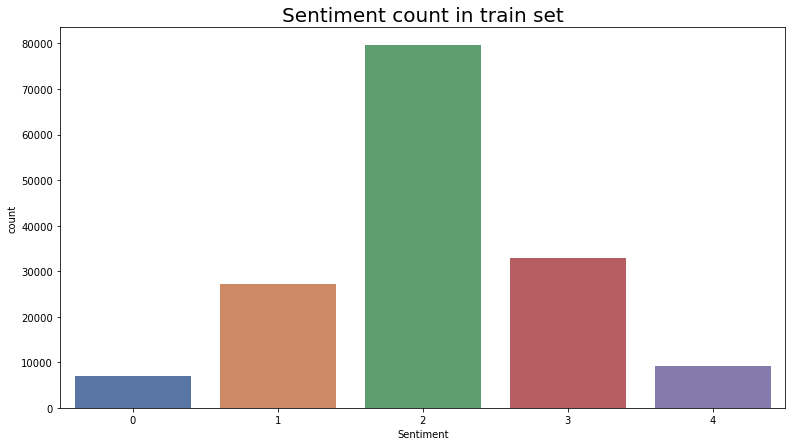

In [6]:
print(train["Sentiment"].unique())

plt.rcParams['figure.figsize'] = (13, 7)

#sns.set(style="white")

sns.countplot(train["Sentiment"], palette='deep')

plt.title('Sentiment count in train set', fontsize = 20)


## 1- Text Preprocessing

In [7]:
def Preprocess(df):


    for i in df['Phrase']:
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        i = tokenizer.tokenize(i)

        
#------------------------------------------------------------------------------------------------
        
    tokenized_review_1 = df['Phrase'].apply(lambda x: x.split())
    


#------------------------------------------------------------------------------------------------



    ps = PorterStemmer()
    WL = WordNetLemmatizer()

    stemmed_review = tokenized_review_1.apply(lambda x: [ps.stem(i) for i in x])
    lemmatized_review = tokenized_review_1.apply(lambda x: [WL.lemmatize(i) for i in x])


#------------------------------------------------------------------------------------------------


    stop = stopwords.words('english')
    stemmed_review = stemmed_review.apply(lambda x: [item for item in x if item not in stop])
    lemmatized_review = lemmatized_review.apply(lambda x: [item for item in x if item not in stop])

    



#------------------------------------------------------------------------------------------------

    for i in range(len(stemmed_review)):
        stemmed_review[i] = ' '.join(stemmed_review[i])

    df['stemmed_review'] = stemmed_review

    
    for i in range(len(lemmatized_review)):
        lemmatized_review[i] = ' '.join(lemmatized_review[i])

    df['lemmatized_review'] = lemmatized_review



    df = df[df["stemmed_review"] != '']
    df = df[df["lemmatized_review"] != '']


In [8]:
Preprocess(train)

In [9]:
Preprocess(test)

In [10]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,stemmed_review,lemmatized_review
0,1,1,A series of escapades demonstrating the adage ...,1,A seri escapad demonstr adag good goos also go...,A series escapade demonstrating adage good goo...
1,2,1,A series of escapades demonstrating the adage ...,2,A seri escapad demonstr adag good goos,A series escapade demonstrating adage good goose
2,3,1,A series,2,A seri,A series
3,4,1,A,2,A,A
4,5,1,series,2,seri,series


In [11]:
print("normal")
print("-"*100)

print(train['Phrase'][0])
print("\nafter stemming")
print("-"*100)

print(train['stemmed_review'][0])

print("\nafter lemmatizing")
print("-"*100)
print(train['lemmatized_review'][0])


normal
----------------------------------------------------------------------------------------------------
A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .

after stemming
----------------------------------------------------------------------------------------------------
A seri escapad demonstr adag good goos also good gander , occasion amus none amount much stori .

after lemmatizing
----------------------------------------------------------------------------------------------------
A series escapade demonstrating adage good goose also good gander , occasionally amuses none amount much story .


In [12]:
plot_train = train.copy()
plot_train

,PhraseId,SentenceId,Phrase,Sentiment,stemmed_review,lemmatized_review
0,1,1,A series of escapades demonstrating the adage ...,1,A seri escapad demonstr adag good goos also go...,A series escapade demonstrating adage good goo...
1,2,1,A series of escapades demonstrating the adage ...,2,A seri escapad demonstr adag good goos,A series escapade demonstrating adage good goose
2,3,1,A series,2,A seri,A series
3,4,1,A,2,A,A
4,5,1,series,2,seri,series
...,...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,hearst 's,Hearst 's
156056,156057,8544,forced avuncular chortles,1,forc avuncular chortl,forced avuncular chortle
156057,156058,8544,avuncular chortles,3,avuncular chortl,avuncular chortle
156058,156059,8544,avuncular,2,avuncular,avuncular


In [13]:
plot_train["Sentiment"].unique()

array([1, 2, 3, 4, 0])

In [14]:
positive_words = plot_train[plot_train["Sentiment"] !=  0 ]
positive_words = positive_words[positive_words["Sentiment"] !=  1 ]
positive_words = positive_words[positive_words["Sentiment"] !=  2 ]



negative_words = plot_train[plot_train["Sentiment"] !=  3 ]
negative_words = negative_words[negative_words["Sentiment"] !=  4 ]
negative_words = negative_words[negative_words["Sentiment"] !=  2 ]


In [15]:
negative_words["Sentiment"].unique()

array([1, 0])

In [16]:
print(negative_words.shape)
print(positive_words.shape)

(34345, 6)
(42133, 6)


In [17]:
plot_all_words = ' '.join(text for text in train['lemmatized_review'])

plot_positive_words = ' '.join(text for text in positive_words['lemmatized_review'])

plot_negative_words = ' '.join(text for text in negative_words['lemmatized_review'])

plot_positive_words[0:1000]


'good goose good amuses This quiet , introspective entertaining independent worth seeking . This quiet , introspective entertaining independent quiet , introspective entertaining independent quiet , introspective entertaining , introspective entertaining introspective entertaining introspective entertaining worth seeking . worth seeking fan A positively thrilling combination ethnography intrigue , betrayal , deceit murder Shakespearean tragedy juicy soap opera . A positively thrilling combination ethnography intrigue , betrayal , deceit murder Shakespearean tragedy juicy soap opera A positively thrilling combination ethnography intrigue , betrayal , deceit murder A positively thrilling combination positively thrilling combination positively thrilling combination thrilling intrigue juicy soap opera juicy soap opera juicy A comedy-drama nearly epic proportion rooted sincere performance title character undergoing midlife crisis . A comedy-drama nearly epic proportion nearly epic proportio

In [18]:
plot_negative_words[0:1000]

"A series escapade demonstrating adage good goose also good gander , occasionally amuses none amount much story . gander , occasionally amuses none amount much story none amount much story none amount much story Even fan Ismail Merchant 's work , I suspect , would hard time sitting one . , I suspect , would hard time sitting one . would hard time sitting one . would hard time sitting one hard time sitting one hard time sitting one hard time hard time sitting one intrigue , betrayal , deceit murder betrayal , deceit murder , deceit murder deceit murder deceit murder Shakespearean tragedy tragedy soap opera Aggressive self-glorification manipulative whitewash . Aggressive self-glorification manipulative whitewash self-glorification manipulative whitewash self-glorification manipulative whitewash manipulative whitewash midlife crisis Narratively , Trouble Every Day plodding mess . , Trouble Every Day plodding mess . Trouble Every Day plodding mess . Trouble plodding mess . plodding mess p

## 2- Word Clouds

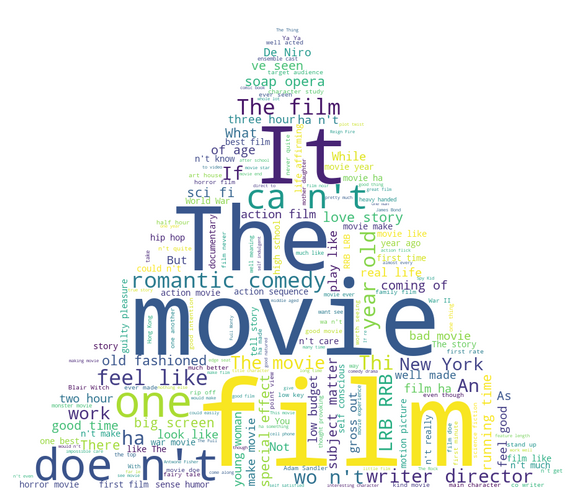

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

Mask = np.array(Image.open(r'../input/triangle/kisspng-black-triangle-computer-icons-symbol-arrow-5af0f4cd97c624.0510697015257407496217.jpg'))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(plot_all_words)

plt.figure(figsize=(10,20))

# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(),interpolation="spline36")

#'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
        
plt.axis('off')
plt.show()

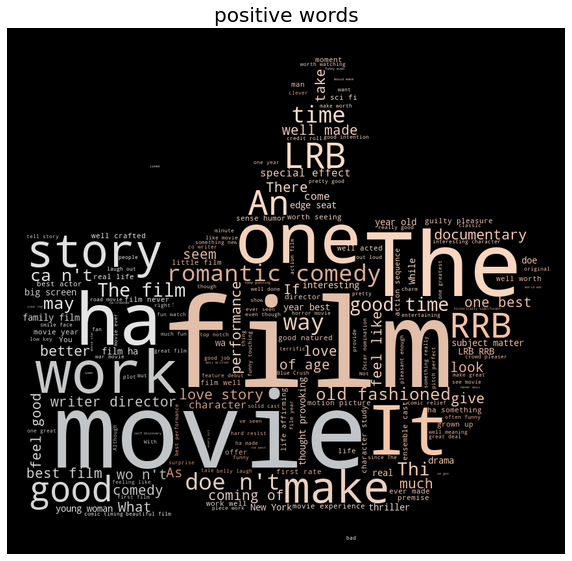

In [20]:
Mask1 = np.array(Image.open(r'../input/likeee/lll.png'))

image_colors = ImageColorGenerator(Mask1)

#def grey_color_func(word, font_size, position, orientation, random_state=None,
 #                   **kwargs):
 #   return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask1).generate(plot_positive_words)

plt.figure(figsize=(10,20))

# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="spline36")

#'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
        
plt.title("positive words", fontsize=20)

plt.axis('off')
plt.show()

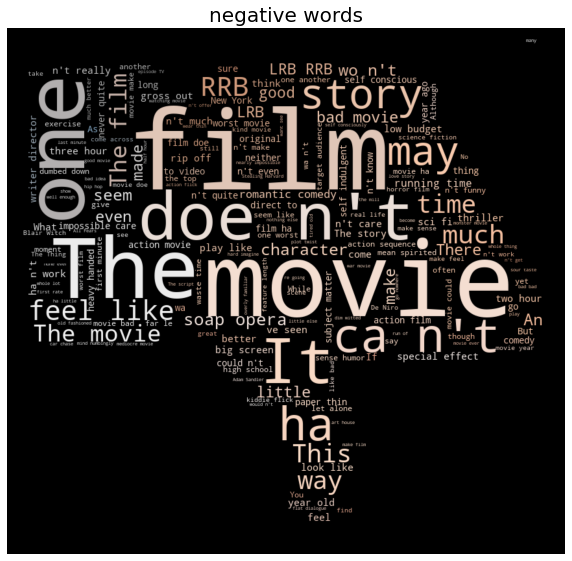

In [21]:
import random


Mask2 = np.array(Image.open(r'../input/dislikee/dislike.jpg'))

image_colors = ImageColorGenerator(Mask2)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask2).generate(plot_negative_words)

plt.figure(figsize=(10,20))

# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

#interpolation : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#                'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#                'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'

plt.title("negative words", fontsize=20)
        
plt.axis('off')
plt.show()

## 3- Predicting sentiment for test data Using NN

In [22]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
y_train_NN = train["Sentiment"]

x_Train_stemmed_NN = train["stemmed_review"]
x_test_stemmed_NN = test["stemmed_review"]

x_Train_lemmatized_NN = train["lemmatized_review"]
x_test_lemmatized_NN = test["lemmatized_review"]

In [24]:
x_Train_stemmed_NN.shape, y_train_NN.shape ,x_test_stemmed_NN.shape


((156060,), (156060,), (66292,))

In [25]:
tokenize = Tokenizer()
tokenize.fit_on_texts(x_Train_stemmed_NN.values)

#X_test = test.stemmed_review
X_train_stemmed = tokenize.texts_to_sequences(x_Train_stemmed_NN)
X_test_stemmed = tokenize.texts_to_sequences(x_test_stemmed_NN)

tokenize.fit_on_texts(x_Train_lemmatized_NN.values)

X_train_lemmatized = tokenize.texts_to_sequences(x_Train_lemmatized_NN)
X_test_lemmatized = tokenize.texts_to_sequences(x_test_lemmatized_NN)

In [26]:
X_train_stemmed = pad_sequences(X_train_stemmed).astype(float)
X_test_stemmed = pad_sequences(X_test_stemmed).astype(float)

X_train_lemmatized = pad_sequences(X_train_lemmatized)
X_test_lemmatized = pad_sequences(X_test_lemmatized)



In [27]:
EMBEDDING_DIM = 100
unknown = len(tokenize.word_index)+1
model = Sequential()
model.add(Embedding(unknown, EMBEDDING_DIM))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2 ))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1904500   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 2,022,393
Trainable params: 2,022,393
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train_stemmed, y_train_NN, batch_size=128, epochs=7, verbose=1)

Epoch 1/7
1220/1220 [==============================] - 133s 109ms/step - loss: 0.9689 - accuracy: 0.6074
Epoch 2/7
1220/1220 [==============================] - 130s 106ms/step - loss: 0.8095 - accuracy: 0.6668
Epoch 3/7
1220/1220 [==============================] - 129s 106ms/step - loss: 0.7564 - accuracy: 0.6850
Epoch 4/7
1220/1220 [==============================] - 131s 107ms/step - loss: 0.7150 - accuracy: 0.6997
Epoch 5/7
1220/1220 [==============================] - 129s 106ms/step - loss: 0.6837 - accuracy: 0.7100
Epoch 6/7
1220/1220 [==============================] - 135s 110ms/step - loss: 0.6603 - accuracy: 0.7190
Epoch 7/7
1220/1220 [==============================] - 129s 106ms/step - loss: 0.6402 - accuracy: 0.7258


In [30]:
final_pred = model.predict_classes(X_test_stemmed)
final_pred

array([3, 3, 2, ..., 2, 2, 1])

## 4- Predicting sentiment for overall set with Naive bayes and NN

In [31]:
test["Sentiment"] = final_pred
test["Sentiment"].value_counts()

2    37731
3    13998
1    10471
4     2393
0     1699
Name: Sentiment, dtype: int64

In [32]:
train["Sentiment"].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [33]:
NB_data = pd.concat([train, test], ignore_index=True)


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer="word")),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

**using stemmed data**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(NB_data['stemmed_review'], NB_data['Sentiment'], test_size=0.2, random_state=42)

pipeline.fit(x_train,y_train)
n_b_predictions = pipeline.predict(x_test)
print(classification_report(n_b_predictions,y_test))
print("-"*100)
print(confusion_matrix(n_b_predictions,y_test))
print("-"*100)
print(pipeline.score(x_train,y_train))
print(accuracy_score(n_b_predictions,y_test))

              precision    recall  f1-score   support

           0       0.30      0.47      0.37      1070
           1       0.46      0.57      0.51      6013
           2       0.84      0.73      0.78     27031
           3       0.56      0.58      0.57      8976
           4       0.32      0.57      0.41      1381

    accuracy                           0.67     44471
   macro avg       0.49      0.58      0.53     44471
weighted avg       0.70      0.67      0.68     44471

----------------------------------------------------------------------------------------------------
[[  508   413   129    18     2]
 [  786  3444  1498   252    33]
 [  348  3220 19608  3497   358]
 [   49   437  1998  5248  1244]
 [    5    27   138   430   781]]
----------------------------------------------------------------------------------------------------
0.7020311331733012
0.6653549504171258


**using lemmatized data**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(NB_data['lemmatized_review'], NB_data['Sentiment'], test_size=0.2, random_state=42)

pipeline.fit(x_train,y_train)
n_b_predictions = pipeline.predict(x_test)
print(classification_report(n_b_predictions,y_test))
print("-"*100)
print(confusion_matrix(n_b_predictions,y_test))
print("-"*100)
print(pipeline.score(x_train,y_train))
print(accuracy_score(n_b_predictions,y_test))

              precision    recall  f1-score   support

           0       0.31      0.46      0.37      1160
           1       0.47      0.56      0.51      6247
           2       0.82      0.73      0.77     26384
           3       0.56      0.58      0.57      9180
           4       0.34      0.54      0.42      1500

    accuracy                           0.66     44471
   macro avg       0.50      0.57      0.53     44471
weighted avg       0.69      0.66      0.67     44471

----------------------------------------------------------------------------------------------------
[[  534   445   145    35     1]
 [  755  3520  1667   269    36]
 [  340  3108 19258  3346   332]
 [   56   438  2145  5306  1235]
 [   11    30   156   489   814]]
----------------------------------------------------------------------------------------------------
0.7083499643019772
0.6618245598255043


NN with lemmatized data

In [37]:
tokenize = Tokenizer()
tokenize.fit_on_texts(x_train.values)
X_test = test.stemmed_review
X_train = tokenize.texts_to_sequences(x_train)
X_test = tokenize.texts_to_sequences(X_test)

In [38]:
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

In [39]:
model.fit(X_train, y_train, batch_size=128, epochs=7, verbose=1)

Epoch 1/7
1390/1390 [==============================] - 147s 106ms/step - loss: 0.9411 - accuracy: 0.6293
Epoch 2/7
1390/1390 [==============================] - 147s 106ms/step - loss: 0.6839 - accuracy: 0.7329
Epoch 3/7
1390/1390 [==============================] - 148s 106ms/step - loss: 0.6061 - accuracy: 0.7644
Epoch 4/7
1390/1390 [==============================] - 148s 106ms/step - loss: 0.5558 - accuracy: 0.7817
Epoch 5/7
1390/1390 [==============================] - 148s 107ms/step - loss: 0.5204 - accuracy: 0.7946
Epoch 6/7
1390/1390 [==============================] - 147s 106ms/step - loss: 0.4928 - accuracy: 0.8031
Epoch 7/7
1390/1390 [==============================] - 147s 106ms/step - loss: 0.4706 - accuracy: 0.8113


In [40]:
final_pred2 = model.predict_classes(X_test_stemmed)
final_pred2

array([1, 1, 2, ..., 2, 2, 2])